In [59]:
#Task 3: Car Price Prediction with Machine Learning 
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
#Load the Dataset
cpp = pd.read_csv(r"C:\Users\NIC\Desktop\DataScience\CodeAlpha\car data.csv")
cpp.head()  

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [61]:
#Data Preprocessing
cpp.isnull().sum() 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [62]:
cpp.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [63]:
#Drop Unnecessary Columns
cpp.drop('Car_Name', axis=1, inplace=True)

In [64]:
#Feature Engineering
from datetime import datetime
current_year = datetime.now().year

# Car Age
cpp['Car_Age'] = current_year - cpp['Year']  # Replace 2026 with current year
cpp.drop('Year', axis=1, inplace=True)

# Mileage per Year
cpp['Mileage_per_Year'] = cpp['Driven_kms'] / (cpp['Car_Age'] + 1)  # Avoid division by 0

# Log transform skewed features
cpp['Driven_kms_log'] = np.log1p(cpp['Driven_kms'])
cpp['Present_Price_log'] = np.log1p(cpp['Present_Price'])

# Drop original 'Driven_kms' if using log version
cpp.drop('Driven_kms', axis=1, inplace=True)

In [65]:
#Encode Categorical Features
le = LabelEncoder()
cat_cols = cpp.select_dtypes(include='object').columns
for col in cat_cols:
    cpp[col] = le.fit_transform(cpp[col])

In [66]:
#Feature Selection
X = cpp.drop("Selling_Price", axis = 1) #Features
y = cpp["Selling_Price"] #Target

In [67]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [68]:
#Model Training
#Model1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Make Prediction with Linear Regression
y_pred_lr = lr_model.predict(X_test)

#Model2: Random Forest 
rf_model = RandomForestRegressor(
    n_estimators=200,  
    max_depth=10,     
    random_state=42
)
rf_model.fit(X_train, y_train)

#Make Prediction with Random Forest
y_pred_rf = rf_model.predict(X_test)

Linear Regression Results:
MAE: 1.277207910854224
MSE: 3.7052860824828424
RMSE: 1.9249119674631467
R² Score: 0.8391494655054598

Random Forest Results:
MAE: 0.6564402976669672
MSE: 1.0016602739940703
RMSE: 1.0008297927190568
R² Score: 0.9565168284263945


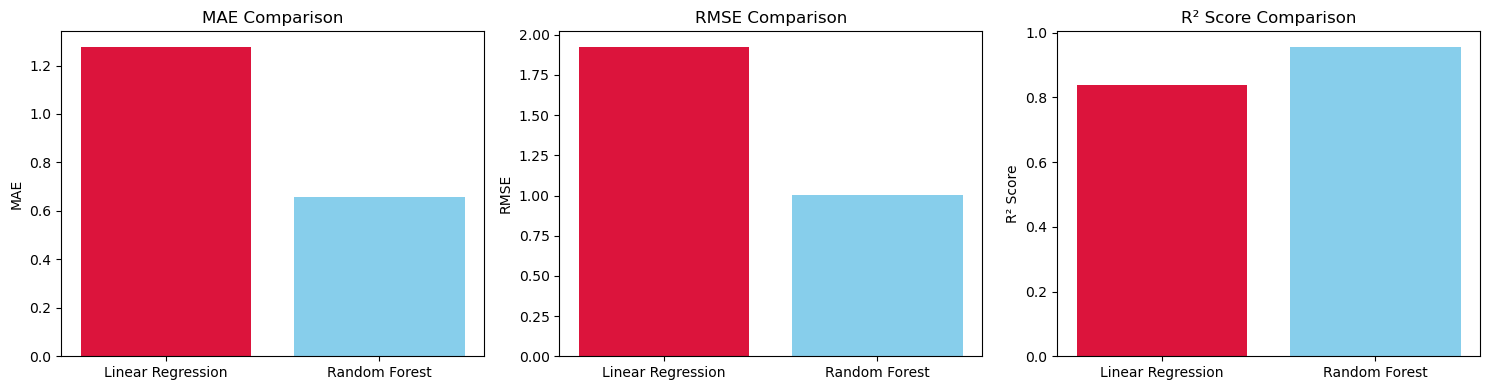

In [69]:
#Model Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("MAE:", mae_lr)      #Avg diff betn predicted and actual prices
print("MSE:", mse_lr)      #Avg sq diff between predicted and actual
print("RMSE:", rmse_lr)    #sq root of MSE. Same units as price
print("R² Score:", r2_lr)  #How well the model explains price variation(Higher)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)

# Model Comparison Visualization
# Models and their metrics
models = ['Linear Regression', 'Random Forest']
mae_scores = [mae_lr, mae_rf]
rmse_scores = [rmse_lr, rmse_rf]
r2_scores = [r2_lr, r2_rf]

colors = ['crimson', 'skyblue'] #Linear = crimson and Random Forest = skyblue

# Create a figure with 3 subplots
plt.figure(figsize=(15,4))

# MAE Comparison
plt.subplot(1,3,1)
plt.bar(models, mae_scores, color=colors)
plt.title("MAE Comparison")
plt.ylabel("MAE")

#RMSE  Comparison
plt.subplot(1,3,2)
plt.bar(models, rmse_scores, color=colors)
plt.title("RMSE Comparison")
plt.ylabel("RMSE")

# R² Score Comparison
plt.subplot(1,3,3)
plt.bar(models, r2_scores, color=colors)
plt.title("R² Score Comparison")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()

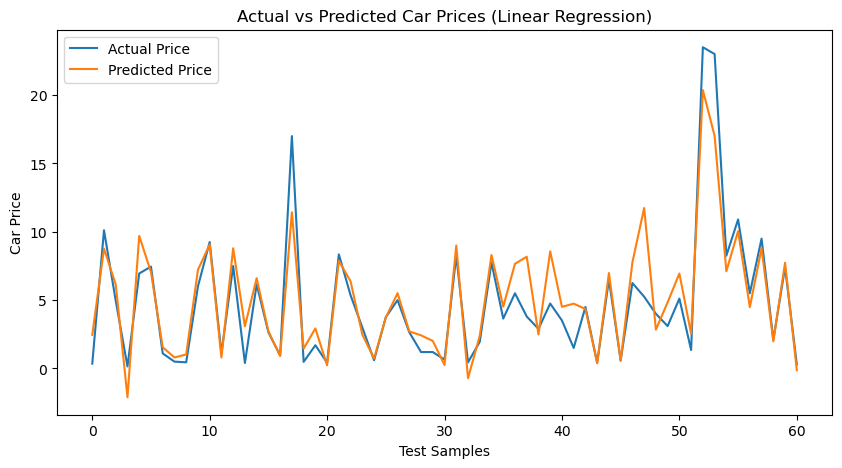

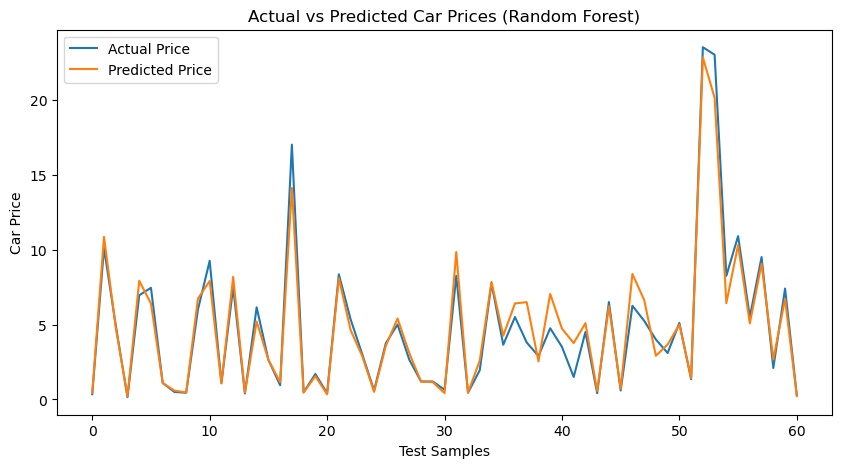

In [70]:
# Model Performance Visualization
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred_lr, label="Predicted Price")
plt.xlabel("Test Samples")
plt.ylabel("Car Price")
plt.title("Actual vs Predicted Car Prices (Linear Regression)")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred_rf, label="Predicted Price")
plt.xlabel("Test Samples")
plt.ylabel("Car Price")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.legend()
plt.show()

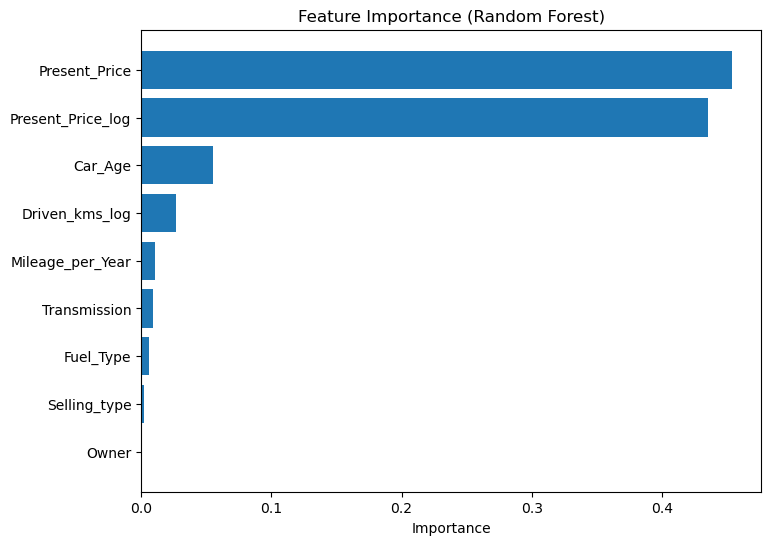

In [76]:
# Feature Importance (Impact on Selling Price)
importances = rf_model.feature_importances_
features = X_train.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

In [29]:
# Example new car features
new_car = {
    'Present_Price': np.log1p(6.0),   # If original Present_Price = 6 lakhs
    'Car_Age': 8,
    'Driven_kms_log': np.log1p(40000),    # original Driven_kms = 36,000
    'Mileage_per_Year': 5000,             # Driven_kms / Car_Age
    'Fuel_Type': 1,                        # Already label-encoded like in your training
    'Selling_type': 0,                     # Encoded
    'Transmission': 0,                     # Encoded
    'Owner': 0,
    'Horsepower': 90,
    'Mileage': 20
}

In [30]:
# Convert to DataFrame
new_car_cpp = pd.DataFrame([new_car])

In [31]:
# Make sure columns match training data
for col in X_train.columns:
    if col not in new_car_cpp.columns:
        new_car_cpp[col] = 0  # Add missing columns with 0

new_car_cpp = new_car_cpp[X_train.columns]  # Reorder columns to match training

In [37]:
# Predict using Random Forest
predicted_price = rf_model.predict(new_car_cpp)
print("Predicted Price:", round(predicted_price[0], 2), "Lakhs")

Predicted Price: 1.02 Lakhs
